In [31]:
from scipy.io import loadmat
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [32]:
def getSuperpixel(img: np.ndarray,lbl:np.ndarray,id: int):
    shp = img.shape
    res = np.zeros(shp)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            res[x,y] = img[x,y] if lbl[x,y] == id else 0.0
    return res

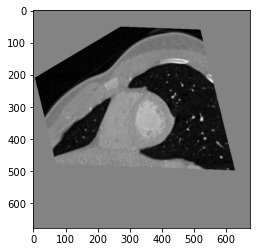

In [33]:
#imagen 1
mat = loadmat('01_CHAVE.mat')
imagen1 = (mat['volumenes'][:,:,9])

plt.imshow(imagen1, cmap=plt.cm.gray)
plt.imsave('volumen0.png',imagen1)

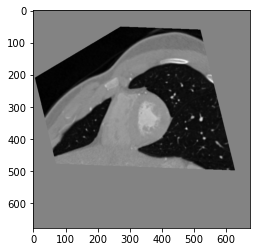

In [34]:
#imagen 2
mat = loadmat('01_CHAVE.mat')
imagen1 = (mat['volumenes'][:,:,5])

plt.imshow(imagen1, cmap=plt.cm.gray)
plt.imsave('volumen1.png',imagen1)

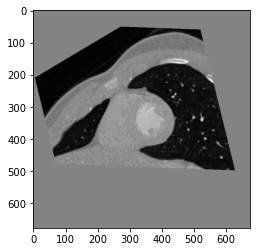

In [35]:
#imagen 3
mat = loadmat('01_CHAVE.mat')
imagen1 = (mat['volumenes'][:,:,1])

plt.imshow(imagen1, cmap=plt.cm.gray)
plt.imsave('volumen2.png',imagen1)

In [36]:
# Datos usados para entrenamiento
volumen0 = plt.imread('volumen0.png')
volumen0 = cv2.cvtColor(volumen0, cv2.COLOR_RGB2GRAY)

volumen1 = plt.imread('volumen1.png')
volumen1 = cv2.cvtColor(volumen1, cv2.COLOR_RGB2GRAY)

# Datos de prueba
volumen2 = plt.imread('volumen2.png')
volumen2 = cv2.cvtColor(volumen2, cv2.COLOR_RGB2GRAY)

In [37]:
def chi_distance(counts1, counts2):
    l = len(counts1)
    distance = 0
    
    for i in range(l):
        if (counts1[i] + counts2[i]):
            distance += ((counts1[i]-counts2[i])**2) / (counts1[i] + counts2[i])
    
    return distance

In [38]:
superPixel0 = slic(img_as_float(volumen0),1000,0.1)
superPixel1 = slic(img_as_float(volumen1),1000,0.1)
superPixel2 = slic(img_as_float(volumen2),1000,0.1)


C:\Users\Luz\AppData\Local\Temp/ipykernel_20800/3017166567.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  superPixel0 = slic(img_as_float(volumen0),1000,0.1)
C:\Users\Luz\AppData\Local\Temp/ipykernel_20800/3017166567.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  superPixel1 = slic(img_as_float(volumen1),1000,0.1)
C:\Users\Luz\AppData\Local\Temp/ipykernel_20800/3017166567.py:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  superPixel2 = slic(img_as_float(volumen2),1000,0.1)


(-0.5, 674.5, 676.5, -0.5)

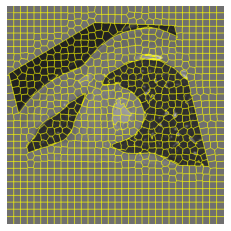

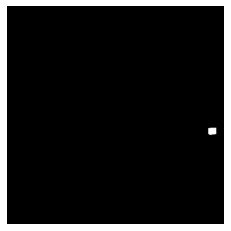

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(volumen1, superPixel1))
plt.axis('off')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(getSuperpixel(volumen1,superPixel1,560), cmap=plt.cm.gray)
plt.axis('off')

In [52]:
regiones_interes = [getSuperpixel(volumen0,superPixel0,250),getSuperpixel(volumen0,superPixel0,255),getSuperpixel(volumen1,superPixel1,240),getSuperpixel(volumen1,superPixel1,245)]

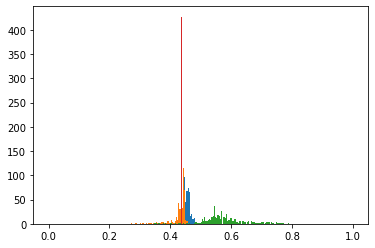

In [53]:
histogramas = []
for region in regiones_interes:
    temp = region[region != 0].ravel()
    n,bins,patches = plt.hist(temp,256,[0,1])
    histogramas.append(n)

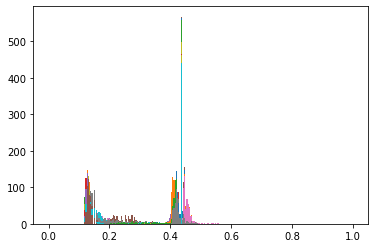

In [42]:
# Prueba
id_interes = []
f = open('salidas.txt','w')

for super_pixel_id in range(1,201):
    superPixel = getSuperpixel(volumen2,superPixel2,super_pixel_id)
    tmp = superPixel[superPixel != 0].ravel()
    n,bins,patches = plt.hist(tmp,256,[0,1])

mean_distance = 0

for hist in histogramas:
    mean_distance += chi_distance(n,hist)
    mean_distance = mean_distance / len(histogramas)

f.write(str(mean_distance)+'\n')
  
if mean_distance < 2000:
    id_interes.append(super_pixel_id)  

f.close()

(-0.5, 674.5, 676.5, -0.5)

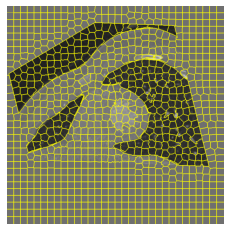

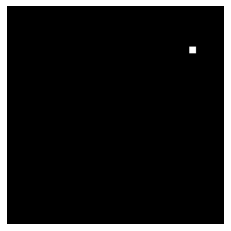

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(volumen2,superPixel2), cmap=plt.cm.gray)
plt.axis('off')

detected_areas = np.zeros(volumen2.shape[:2])
for id in id_interes:
    detected_areas += getSuperpixel(volumen2, superPixel2,id)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(detected_areas, cmap=plt.cm.gray)
plt.axis('off')